In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='./data/'

users = pd.read_csv('processed_users_2.csv')
books = pd.read_csv('basic_preprocess_books.csv')
ratings = pd.read_csv(path+'train_ratings.csv')
title_label_data = pd.read_csv('isbn_title_dataset.csv')

In [3]:
gt_fiction_data = books[books['category_high']=='fiction']
pred_fiction_data = title_label_data[['isbn','label']]

In [4]:
pred_fiction_data['label'] = pred_fiction_data['label'].apply(lambda x: x.lower())

/tmp/ipykernel_60164/1279227253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_fiction_data['label'] = pred_fiction_data['label'].apply(lambda x: x.lower())


In [5]:
pred_fiction_data.sample(3)

,isbn,label
85300,0345410297,fiction
73414,0938817442,fiction
143907,0891344608,non-fiction


In [6]:
gt_fiction_data.drop(['Unnamed: 0'], axis=1, inplace=True)

/tmp/ipykernel_60164/2527333095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_fiction_data.drop(['Unnamed: 0'], axis=1, inplace=True)


In [7]:
gt_fiction_data.sample(3)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,summary,img_path,category_high
35460,0765302705,Callahan's Con,Spider Robinson,2003.0,Tor Books,http://images.amazon.com/images/P/0765302705.0...,en,Raves for Spider Robinson “Spider Robinson is ...,images/0765302705.01.THUMBZZZ.jpg,fiction
9374,0312144504,The Year's Best Fantasy and Horror: Ninth Annu...,Ellen Datlow,1996.0,St. Martin's Griffin,http://images.amazon.com/images/P/0312144504.0...,en,"This renowned series, recipient of three World...",images/0312144504.01.THUMBZZZ.jpg,fiction
437,0515130923,Dawn in Eclipse Bay,Jayne Ann Krentz,2001.0,Jove Books,http://images.amazon.com/images/P/0515130923.0...,en,Just months after the wedding of their sibling...,images/0515130923.01.THUMBZZZ.jpg,fiction


In [8]:
fiction_data_isbn = gt_fiction_data['isbn'].values

In [9]:
print(fiction_data_isbn)
print(len(fiction_data_isbn))

['0399135782' '074322678X' '0771074670' ... '0449225208' '0689818904'
 '0912333022']
39678


In [10]:
cnt_true = 0

In [11]:
list(pred_fiction_data[pred_fiction_data['isbn'] == '0671870432']['label'])

['non-fiction']

In [12]:
import tqdm
import time

In [13]:
for idx,isbn in tqdm.tqdm(enumerate(fiction_data_isbn)):
    if list(pred_fiction_data[pred_fiction_data['isbn'] == isbn]['label'])[0] == 'fiction':
        cnt_true += 1

39678it [07:06, 93.13it/s]


In [14]:
acc = cnt_true / len(fiction_data_isbn)
print(acc * 100)

90.85639397147034


In [65]:
def cat2num(s:str):
    return 1 if s == 'fiction' else 0

In [66]:
y_true = gt_fiction_data['category_high'].apply(lambda x: cat2num(x)).values
y_true

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
len(y_true)

39678

In [73]:
merge = gt_fiction_data.merge(pred_fiction_data, how='left', on='isbn')

In [78]:
ground_true = list(map(cat2num, merge['category_high'].values))
pred = list(map(cat2num, merge['label'].values))

In [88]:
ground_true = merge['category_high']
pred = merge['label']

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ground_true, pred)

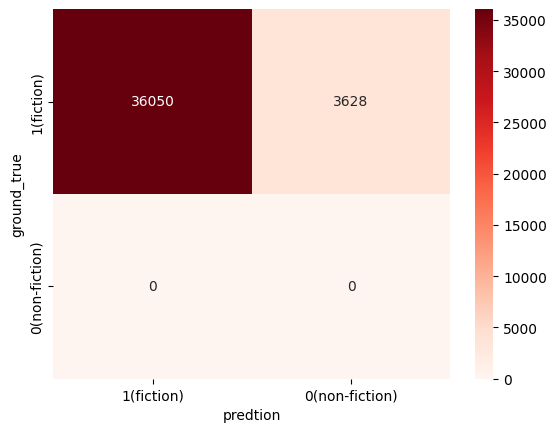

In [97]:
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('predtion')
plt.ylabel('ground_true')
plt.xticks([0.5,1.5],['1(fiction)', '0(non-fiction)'])
plt.yticks([0.5,1.5],['1(fiction)', '0(non-fiction)'])
plt.show()

In [81]:
36050/(36050 + 3628)

0.9085639397147034